In [1]:
#Importing Python Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
#Importing the Dataset
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Exploring the Dataset
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [4]:
#checking the shape of the data
customers.shape

(200, 5)

In [5]:
#Checking for null values 
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Renaming some column names in the Dataset
customers.rename(columns={'Annual Income (k$)' : 'Annual_Income' , 'Spending Score (1-100)' : 'Spending_Score'}, inplace=True)
customers.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Distribution of gender in the mall

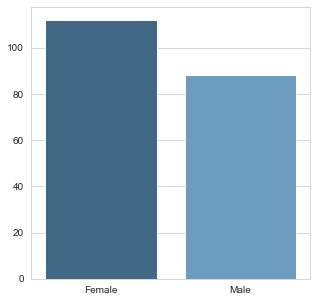

In [7]:
genders = customers.Gender.value_counts()
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.barplot(x=genders.index, y=genders.values,  palette="Blues_d")
plt.show()

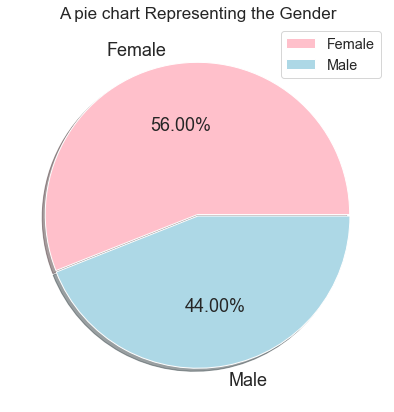

In [8]:
labels = ['Female', 'Male']
size = customers['Gender'].value_counts()
colors = ['pink', 'lightblue']
explode = [0, 0.01]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%', textprops={'fontsize': 18})
plt.title('A pie chart Representing the Gender',fontsize=17)
plt.axis('off')
plt.legend(fontsize='x-large')
plt.show()

## Distribution of number of customers in each age group

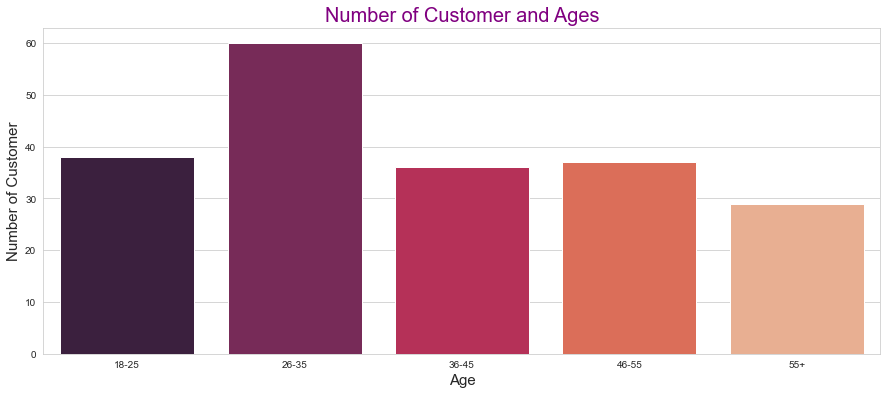

In [9]:
age18_25 = customers.Age[(customers.Age <= 25) & (customers.Age >= 18)]
age26_35 = customers.Age[(customers.Age <= 35) & (customers.Age >= 26)]
age36_45 = customers.Age[(customers.Age <= 45) & (customers.Age >= 36)]
age46_55 = customers.Age[(customers.Age <= 55) & (customers.Age >= 46)]
age55above = customers.Age[customers.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages", fontsize=20, c='purple')
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()


## Distribution of Annual Income

In [10]:
def count_rows(rows):
    return len(rows)
A_I=customers.groupby('Annual_Income').apply(count_rows)
A_I

Annual_Income
15     2
16     2
17     2
18     2
19     4
      ..
103    4
113    2
120    2
126    2
137    2
Length: 64, dtype: int64

In [11]:
annual_income=A_I.sort_values()
annual_income

Annual_Income
15      2
58      2
59      2
126     2
61      2
       ..
62      6
87      6
60      6
78     12
54     12
Length: 64, dtype: int64

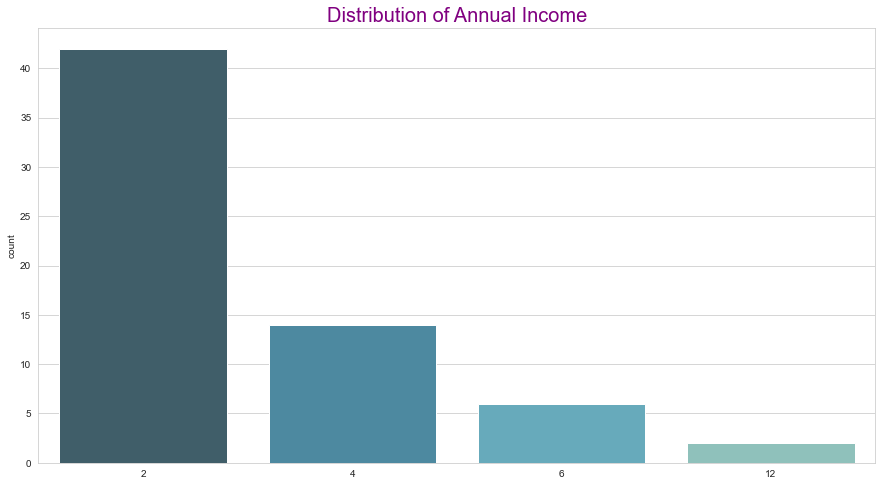

In [12]:

plt.rcParams['figure.figsize']=(15,8)
sns.countplot(A_I, palette='GnBu_d')
plt.title('Distribution of Annual Income', fontsize=20, c='purple')
plt.show()

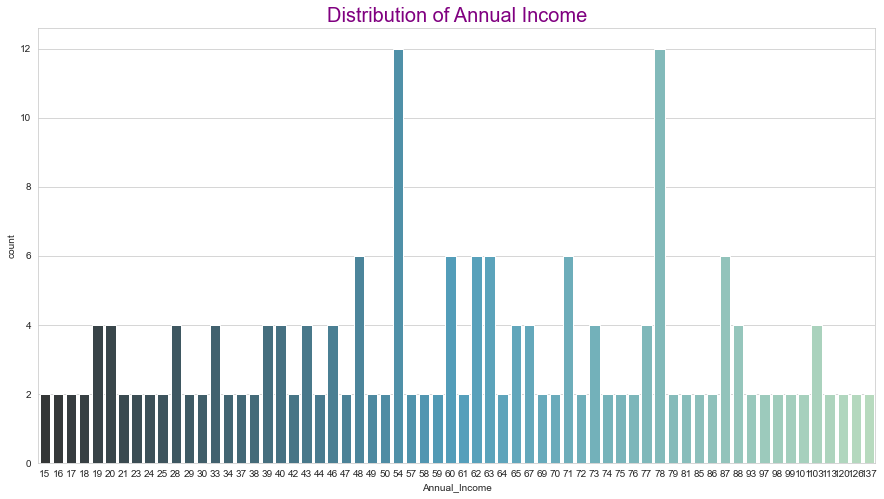

In [13]:
plt.rcParams['figure.figsize']=(15,8)
sns.countplot(customers['Annual_Income'], palette='GnBu_d')
plt.title('Distribution of Annual Income', fontsize=20, c='purple')
plt.show()

## Distribution of Spending Score

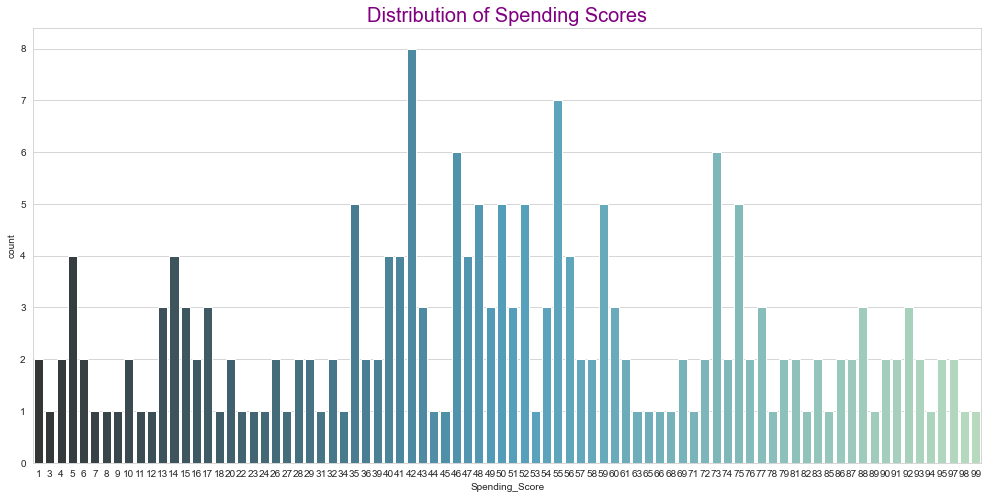

In [14]:
plt.rcParams['figure.figsize']=(17,8)
sns.countplot(customers['Spending_Score'], palette='GnBu_d')
plt.title('Distribution of Spending Scores', fontsize=20, c='purple')
plt.show()

## Age vs Annual Income

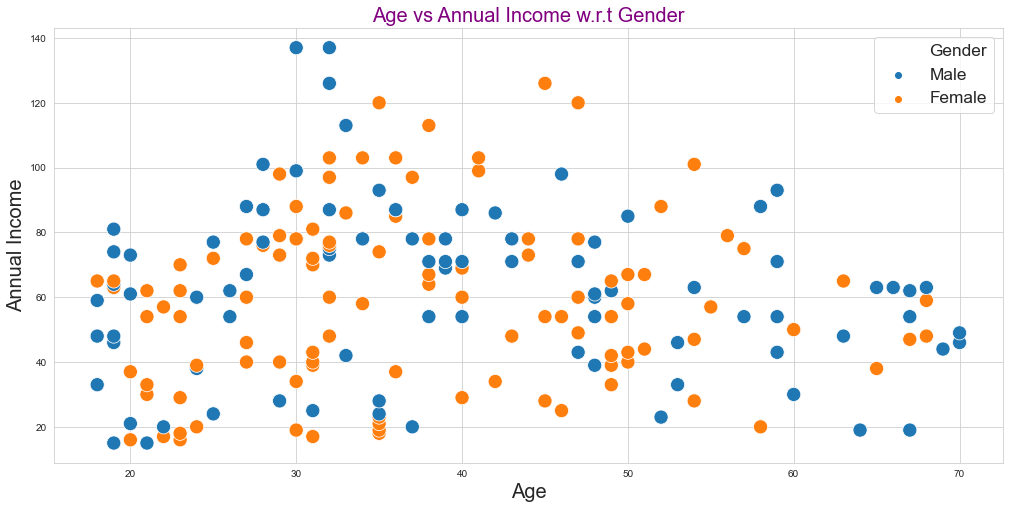

In [15]:
sns.scatterplot(x="Age", y="Annual_Income",
                     hue="Gender",data=customers,s=200)

plt.xlabel("Age", size=20)
plt.ylabel("Annual Income", size=20)
plt.title('Age vs Annual Income w.r.t Gender',fontsize=20, c='purple')
plt.legend(fontsize='xx-large')


## Age vs Spending scores

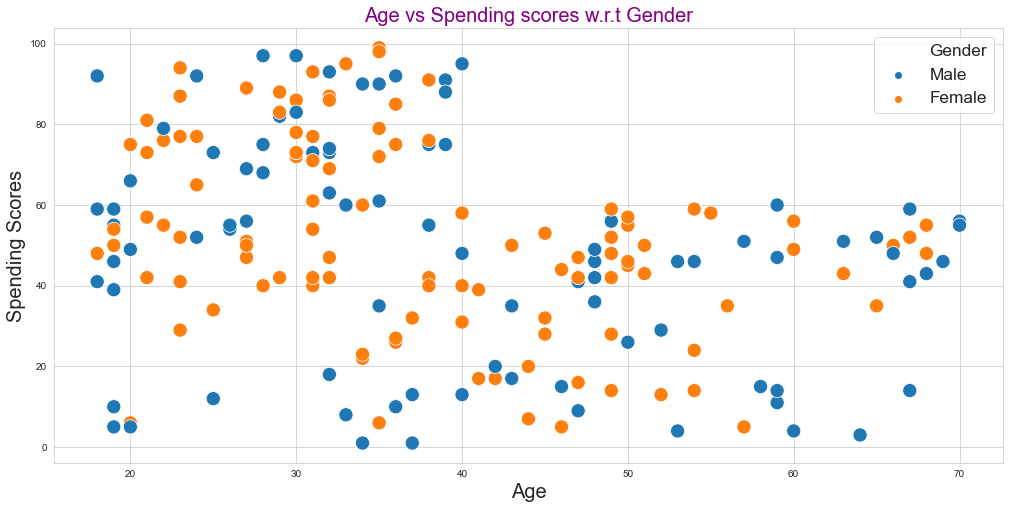

In [16]:
sns.scatterplot(x="Age", y="Spending_Score",
                     hue="Gender",data=customers,s=200)

plt.xlabel("Age", size=20)
plt.ylabel("Spending Scores", size=20)
plt.title('Age vs Spending scores w.r.t Gender',fontsize=20, c='purple')
plt.legend(fontsize='xx-large')


## Annual Income vs Spending Scores

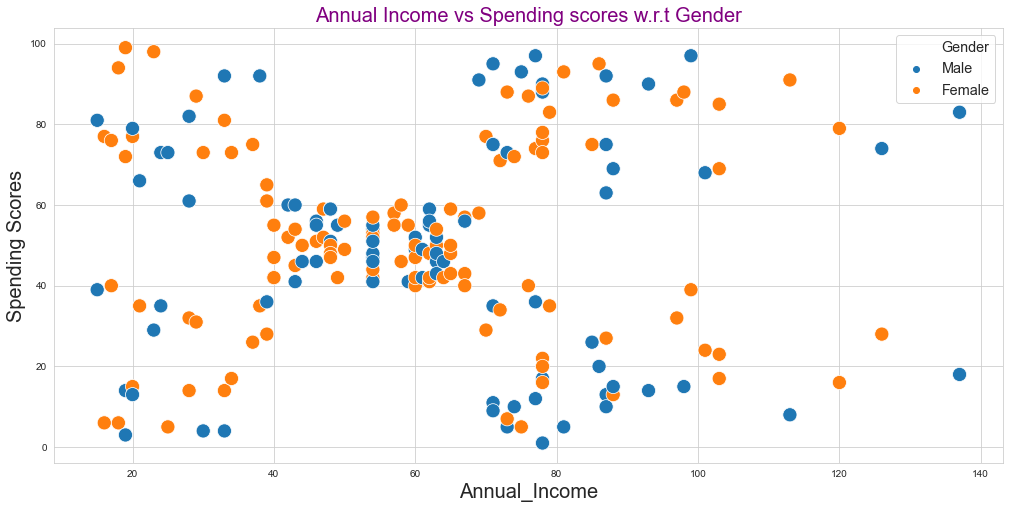

In [17]:
sns.scatterplot(x="Annual_Income", y="Spending_Score",
                     hue="Gender",data=customers,s=200)

plt.xlabel("Annual_Income", size=20)
plt.ylabel("Spending Scores", size=20)
plt.title('Annual Income vs Spending scores w.r.t Gender',fontsize=20, c='purple')
plt.legend(fontsize='x-large')


## Choosing optimal number of clusters by plotting elbow plot

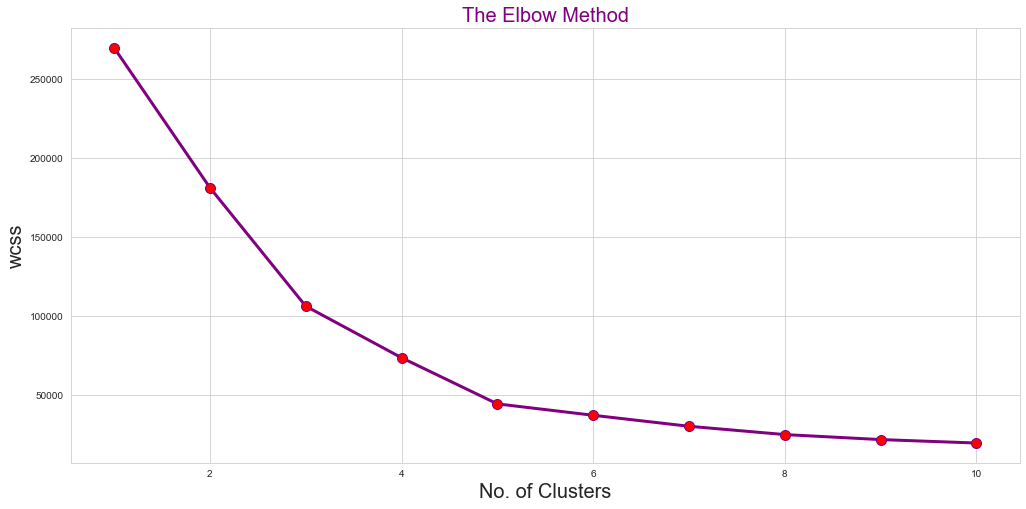

In [18]:
X=customers.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, color='purple',lw=3, marker='o', markersize=10, markerfacecolor="red")
plt.title('The Elbow Method', fontsize = 20, c='purple')
plt.xlabel('No. of Clusters',fontsize=20)
plt.ylabel('wcss',fontsize=20)
plt.show()

## Optimal no of clusters is 5.

<function matplotlib.pyplot.show(*args, **kw)>

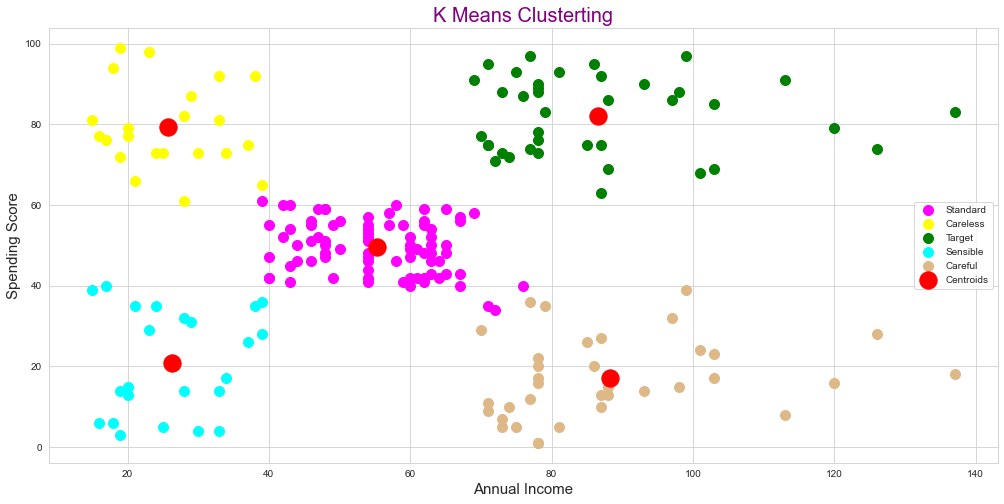

In [19]:
X=customers.iloc[:, [3, 4]].values

kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='Careless')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Sensible')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Careful')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('K Means Clusterting', fontsize=20, c='purple')
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Spending Score', fontsize=15)
plt.legend()
plt.show

## Relation between Age and Spending Score

<function matplotlib.pyplot.show(*args, **kw)>

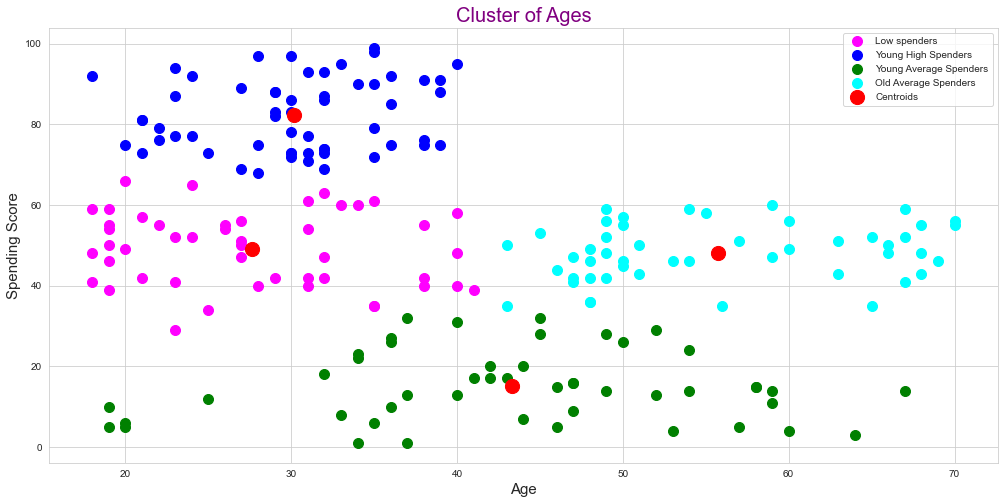

In [20]:
X1=customers.iloc[:,[2,4]].values

kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X1)

plt.scatter(X1[y_kmeans==0,0],X1[y_kmeans==0,1],s=100,c='magenta',label='Low spenders ')
plt.scatter(X1[y_kmeans==1,0],X1[y_kmeans==1,1],s=100,c='blue',label='Young High Spenders')
plt.scatter(X1[y_kmeans==2,0],X1[y_kmeans==2,1],s=100,c='green',label='Young Average Spenders')
plt.scatter(X1[y_kmeans==3,0],X1[y_kmeans==3,1],s=100,c='cyan',label='Old Average Spenders')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of Ages', fontsize=20, c='purple')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Spending Score', fontsize=15)
plt.legend()
plt.ioff()
plt.show

## Relation between Age and Annual Income

<function matplotlib.pyplot.show(*args, **kw)>

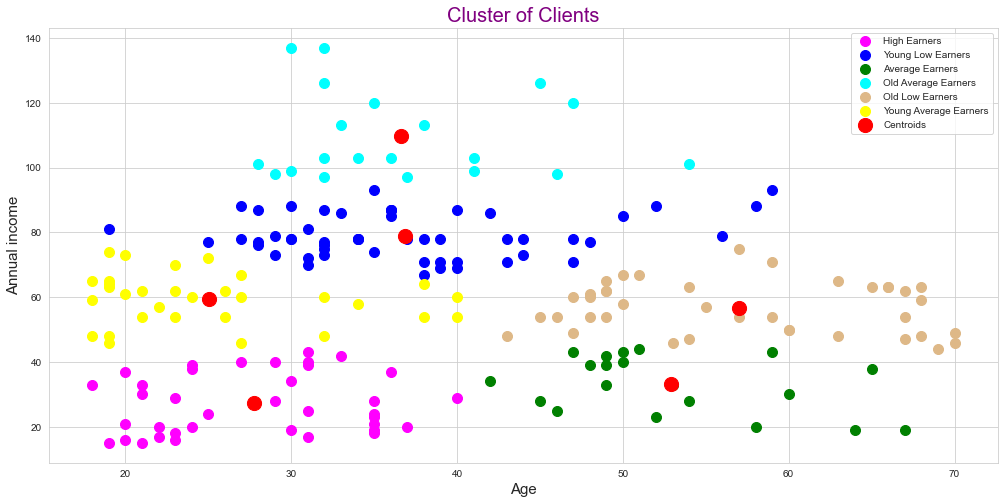

In [21]:
X2=customers.iloc[:,[2,3]].values

kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X2)

plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=100,c='magenta',label='High Earners ')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=100,c='blue',label='Young Low Earners')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=100,c='green',label='Average Earners')
plt.scatter(X2[y_kmeans==3,0],X2[y_kmeans==3,1],s=100,c='cyan',label='Old Average Earners')
plt.scatter(X2[y_kmeans==4,0],X2[y_kmeans==4,1],s=100,c='burlywood',label='Old Low Earners ')
plt.scatter(X2[y_kmeans==5,0],X2[y_kmeans==5,1],s=100,c='yellow',label='Young Average Earners')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of Clients',fontsize=20,c='purple')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Annual income',fontsize=15)
plt.legend()
plt.ioff()
plt.show

## Relation between Age,Annual Income and spending score

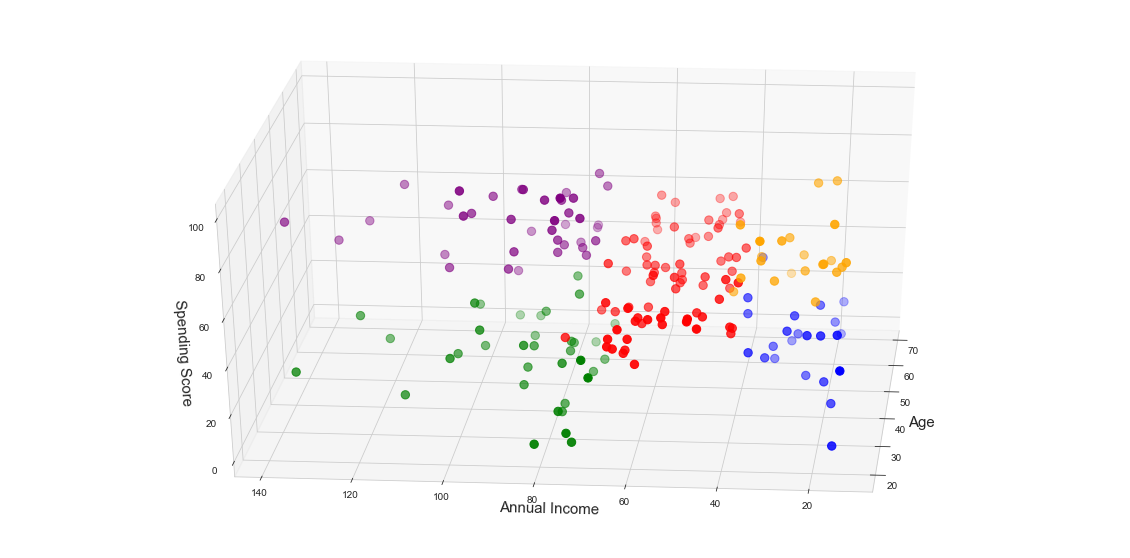

In [22]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=5)
clusters = km.fit_predict(customers.iloc[:,2:])
customers["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customers.Age[customers.label == 0], customers["Annual_Income"][customers.label == 0], customers["Spending_Score"][customers.label == 0], c='blue', s=70)
ax.scatter(customers.Age[customers.label == 1], customers["Annual_Income"][customers.label == 1], customers["Spending_Score"][customers.label == 1], c='red', s=70)
ax.scatter(customers.Age[customers.label == 2], customers["Annual_Income"][customers.label == 2], customers["Spending_Score"][customers.label == 2], c='green', s=70)
ax.scatter(customers.Age[customers.label == 3], customers["Annual_Income"][customers.label == 3], customers["Spending_Score"][customers.label == 3], c='orange', s=70)
ax.scatter(customers.Age[customers.label == 4], customers["Annual_Income"][customers.label == 4], customers["Spending_Score"][customers.label == 4], c='purple', s=70)
ax.view_init(30, 185)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income", fontsize=15)
ax.set_zlabel('Spending Score', fontsize=15)
plt.show()